In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
def clean_boundary_inplace(array: np.ndarray, boundary_size: int, fill_value = False) -> np.ndarray:
    array[:boundary_size, :] = fill_value
    array[-boundary_size:, :] = fill_value
    array[:, :boundary_size] = fill_value
    array[:, -boundary_size:] = fill_value
    return array

# intial array
dim = 20
pile = np.random.randint(0, 4, (dim, dim))
number_of_grains = 10000000
avalanches = []
for i in range(number_of_grains):
    # drive
    x, y = np.random.randint(1, dim - 1, size = 2)
    pile[x, y] += 1
    # select critical points
    peaks = np.vstack(np.where(clean_boundary_inplace(pile > 3, 1))).T
    avalanche_size = 0
    while peaks.size > 0:
        for x,y in peaks:
            avalanche_size += 1
            peak_pattern = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
            pile[x-1:x+2, y-1:y+2] = pile[x-1:x+2, y-1:y+2] + peak_pattern
        peaks = np.vstack(np.where(clean_boundary_inplace(pile > 3, 1))).T
    avalanches.append(avalanche_size)

plt.hist(avalanches, log = True)

(array([9.2029e+04, 4.5240e+03, 2.0940e+03, 8.0400e+02, 3.2500e+02,
        1.1900e+02, 6.2000e+01, 2.5000e+01, 1.4000e+01, 4.0000e+00]),
 array([  0. ,  57.5, 115. , 172.5, 230. , 287.5, 345. , 402.5, 460. ,
        517.5, 575. ]),
 <a list of 10 Patch objects>)

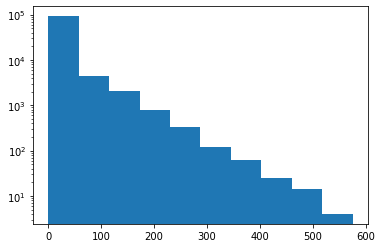

In [53]:
plt.hist(avalanches, log = True)